# **Notebook Outline**
Introduction & Imports

Data Loading

Exploratory Data Analysis

Preprocessing & Feature Engineering

Feature Scaling

Train-Test Split

Model Training

Evaluation

Hyperparameter Tuning

Cross-Validation

Pipeline Example

Exercises

Wrap-up Discussion

**In this notebook, we’ll build a Logistic Regression model to predict if a tumor is malignant or benign.**

We’ll cover:

Data cleaning and preprocessing

Feature engineering (polynomial features)

Scaling

Model training and evaluation

Hyperparameter tuning

Cross-validation

This workflow mirrors how data scientists build models in the industry.

In [ ]:
# Import necessary Python libraries
import pandas as pd  # pandas is used for data manipulation and analysis, it allows us to work with tables (dataframes)
import numpy as np   # numpy is used for numerical computations, especially arrays and mathematical functions

from sklearn.datasets import load_breast_cancer  # Import a built-in dataset for classification problems
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
# train_test_split splits the data into training and testing sets
# GridSearchCV helps us find the best hyperparameters for our model by trying different combinations
# StratifiedKFold is a type of cross-validation that preserves class proportions in each fold
# cross_val_score runs cross-validation and returns performance scores

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# StandardScaler standardizes features by removing the mean and scaling to unit variance
# MinMaxScaler scales features to a fixed range, usually [0,1]
# PolynomialFeatures generates new features by creating polynomial combinations of existing features

from sklearn.pipeline import Pipeline  # Pipeline allows us to chain preprocessing and modeling steps for cleaner code

from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
# These are functions to evaluate how well the model performs

import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization

import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings for cleaner output


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

We’ll load the Breast Cancer dataset included in scikit-learn.
This dataset has:

569 samples

30 numeric features

Binary target (0 = malignant, 1 = benign)

In [ ]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Dataset shape: (569, 30)
Target distribution:
 1    357
0    212
Name: count, dtype: int64


Exploratory Data Analysis
Let’s look at the basic statistics and class balance.

In [ ]:
# Describe feature statistics
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Describe feature statistics
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

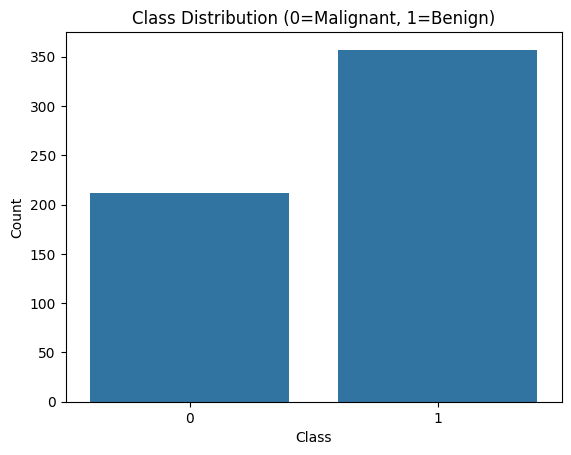

In [ ]:
# Visualize class distribution
sns.countplot(x=y)  #argument specifies that the values from the pandas Series y should be used to determine the categories on the x-axis and their corresponding counts.
plt.title("Class Distribution (0=Malignant, 1=Benign)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Exercise 1:
Print the correlation of each feature with the target.
Which features are most predictive?

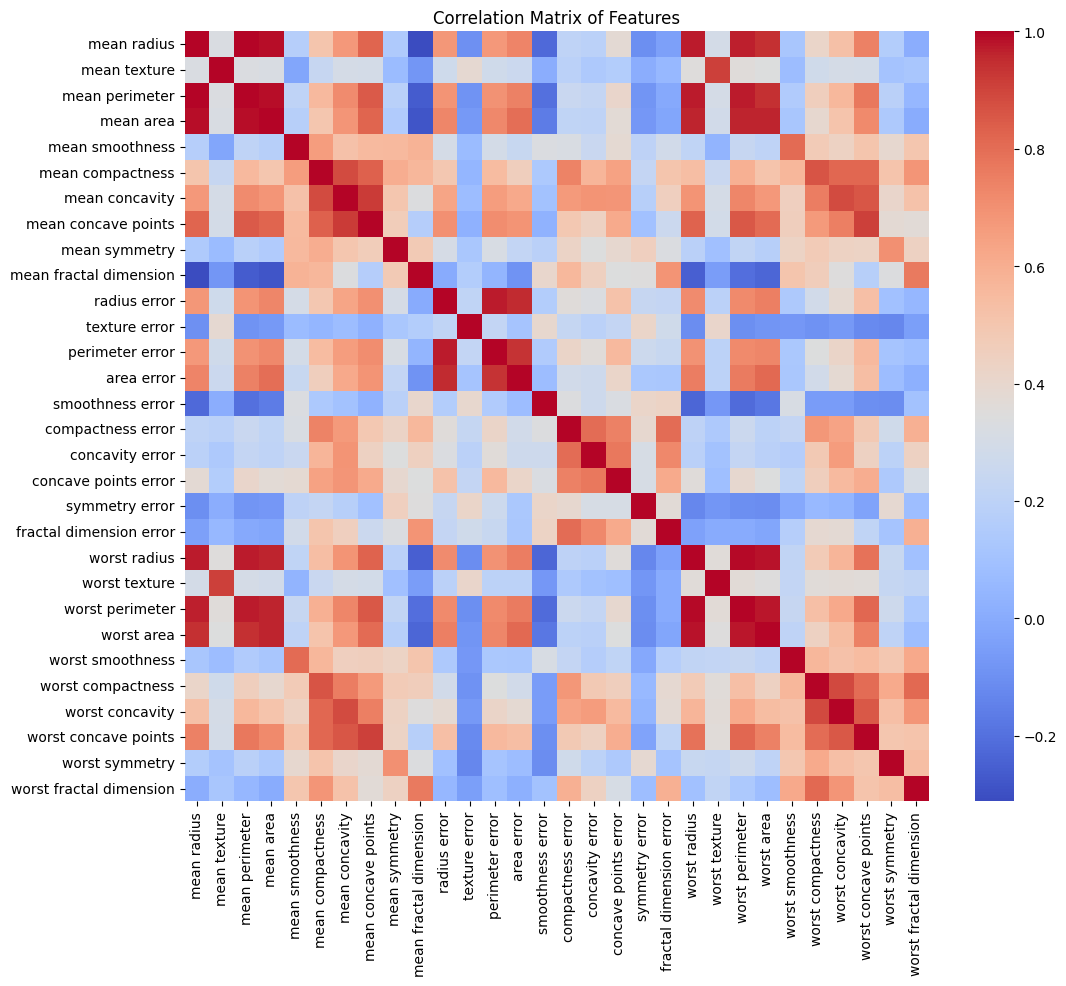

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # annot=False to avoid clutter with too many features
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Get top positively correlated features
top_positive_corr = corr.sort_values(ascending=False).head(5)
print("Top 5 positively correlated features:\n", top_positive_corr)

# Get top negatively correlated features
top_negative_corr = corr.sort_values(ascending=True).head(5)
print("\nTop 5 negatively correlated features:\n", top_negative_corr)

Top 5 positively correlated features:
 smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
dtype: float64

Top 5 negatively correlated features:
 worst concave points   -0.793566
worst perimeter        -0.782914
mean concave points    -0.776614
worst radius           -0.776454
mean perimeter         -0.742636
dtype: float64


In [ ]:
corr = X.corrwith(y)
top_features = corr.abs().sort_values(ascending=False).head(5)
print("Top 3 correlated features:\n", top_features)
# -1,1 : strong correlation, 0 : weak correlation

Top 3 correlated features:
 worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
dtype: float64


In [ ]:
corr = X.corrwith(y)
top_features = corr.abs().sort_values(ascending=False).tail(10) # -1,1 : strong correlation, 0 : weak correlation
print (top_features)

mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
dtype: float64


Exercise: Drop the weakly correlated features from your dataset, check the performance of your model and compare it with the model without dropping any features

Preprocessing & Feature Engineering
Polynomial features can help the model learn interactions between variables.

In [ ]:
# Check for missing data in each feature column
print(X.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = pd.DataFrame(poly.fit_transform(X), columns=poly.get_feature_names_out(X.columns))

print("Original feature count:", X.shape[1])
print("Polynomial feature count:", X_poly.shape[1])


Original feature count: 30
Polynomial feature count: 465


Exercise 2:
Try degree=3, 4 .. PolynomialFeatures and see how many features are generated.

 Feature Selection
Let’s select the top 10 correlated features to reduce dimensionality.

In [ ]:
top_feats = corr.abs().sort_values(ascending=False).head(10).index
X_selected = X_poly[top_feats]

print("Selected features shape:", X_selected.shape)


Selected features shape: (569, 10)


Feature Scaling
Scaling ensures gradient descent converges effectively.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


Exercise 3:
Swap StandardScaler with MinMaxScaler and observe any differences in performance later.

Train-Test Split
Split the data into training and test sets (70%-30%).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (398, 10)
Test shape: (171, 10)


# A**pproach 1 : Default hyperparameter logistic regression model**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [ ]:
print ("accuracy:", accuracy_score(y_test, y_pred))
print ("recall:", recall_score(y_test, y_pred))
print ("f1 score:", f1_score(y_test, y_pred))
print ("confusion matrix:\n", confusion_matrix(y_test, y_pred))
print ("classification report:\n", classification_report(y_test, y_pred))

Model Training
We create a Logistic Regression model with regularization and class weighting.

# Approach 2: manual tuning of the hyperparameters for LR model** **bold text**

In [ ]:
model = LogisticRegression(
    penalty='l2',
    solver='saga',
    max_iter=1000,
    C=1.0,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42, solver='saga')

Evaluation
Let’s check metrics and the ROC curve.

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9064327485380117
Recall: 0.9065420560747663
F1 Score: 0.9238095238095239

Confusion Matrix:
 [[58  6]
 [10 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.94      0.91      0.92       107

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



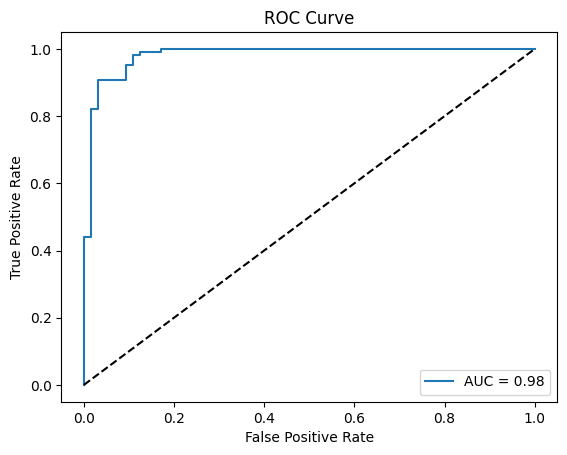

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Hyperparameter Tuning with Grid Search

Try different C values and penalties to improve performance.




# **Approach 3 : Using gridsearch optimization algorithm with the logistic regression model**


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'libilinear'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1),
    param_grid,
    scoring='f1',  #accuracy  #cost function
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 (CV):", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best F1 (CV): 0.9673803417024416


Exercise: gridsearch optimization by using Linear regression model

Cross-Validation Performance

In [ ]:
best_model = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_scaled, y, cv=cv, scoring='f1')

print("F1 scores per fold:", cv_scores)
print("Mean F1:", cv_scores.mean())


F1 scores per fold: [0.97142857 0.95104895 0.95104895 0.97142857 0.97222222]
Mean F1: 0.9634354534354534


In [ ]:
#final test performance
# Evaluate final model on test set
y_pred_final = best_model.predict(X_test)
print("Final test set F1 score:", f1_score(y_test, y_pred_final))


Final test set F1 score: 0.9585253456221198


Pipeline Example
Combine all preprocessing and modeling in one pipeline.

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        class_weight='balanced',
        solver='saga',
        max_iter=1000,
        random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred_pipe = pipeline.predict(X_test)

print("Pipeline F1 Score:", f1_score(y_test, y_pred_pipe))


Pipeline F1 Score: 0.9289099526066351


Exercise: add more preprocessing steps, add optimization using gridsearchcv

Exercises to Try
-Try degree=3 in PolynomialFeatures
- Use MinMaxScaler instead of StandardScaler
- Remove class_weight='balanced' and test performance
- Switch to penalty='elasticnet' (requires l1_ratio)



In [ ]:

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l2',             # Type of regularization ('l1', 'l2', or 'elasticnet')
        solver='saga',            # Optimizer that supports all penalties and is suitable for large datasets
        max_iter=1000,            # Maximum number of iterations for convergence
        C=1.0,                    # Inverse of regularization strength (lower = stronger regularization)
        class_weight='balanced', # Automatically adjust weights for class imbalance
        random_state=42,          # Ensures reproducibility
        n_jobs=-1,                # Use all processors to train faster
        tol=1e-4,                 # Tolerance for stopping criteria (lower = stricter convergence)
        l1_ratio=None,            # Used only with 'elasticnet'; controls mix between L1 and L2
        fit_intercept=True,       # Adds intercept (bias term) to the model
        warm_start=False,         # If True, reuse solution of previous call to fit
        verbose=0,                # Set to 1 or more to see output logs while fitting
        dual=False                # Use dual formulation only for ‘l2’ with liblinear solver (not saga)
    ))
])

Accuracy: 0.9122807017543859
Precision: 0.9423076923076923
Recall: 0.9158878504672897
F1 Score: 0.9289099526066351
ROC AUC Score: 0.9829147196261683

Confusion Matrix:
 [[58  6]
 [ 9 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.94      0.92      0.93       107

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



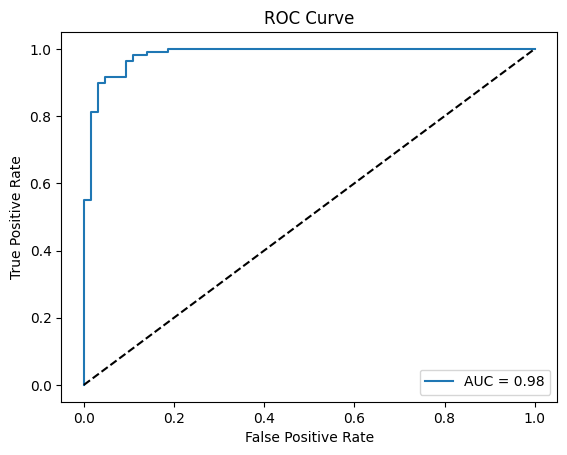

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict labels
y_pred = pipeline.predict(X_test)

# Predict probabilities for ROC curve
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
